In [1]:
import cv2
import matplotlib.pyplot as plt


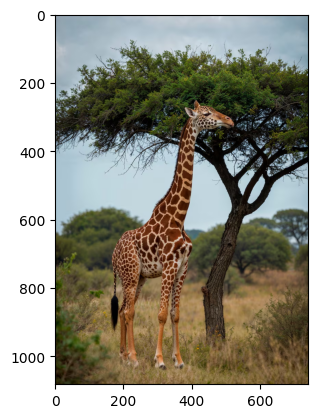

In [4]:
# RGB
image =cv2.imread("/content/giraffe.avif")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

In [5]:
#height, width, 3 color channels
#After split You get 3 separate 2D images:
#3D (H,W,3)
channels=cv2.split(image_rgb)
channels

(array([[151, 151, 152, ..., 129, 129, 128],
        [151, 151, 151, ..., 129, 128, 128],
        [151, 151, 151, ..., 129, 128, 128],
        ...,
        [ 19,  23,  29, ..., 107,  99, 101],
        [ 20,  24,  29, ...,  97,  98, 103],
        [ 21,  25,  30, ...,  98, 101, 106]], dtype=uint8),
 array([[163, 163, 164, ..., 153, 153, 152],
        [163, 163, 163, ..., 153, 152, 152],
        [163, 163, 163, ..., 153, 152, 152],
        ...,
        [  6,  10,  17, ...,  83,  75,  77],
        [  5,  10,  16, ...,  72,  73,  78],
        [  6,  11,  17, ...,  73,  76,  81]], dtype=uint8),
 array([[177, 177, 178, ..., 166, 166, 165],
        [177, 177, 177, ..., 166, 165, 165],
        [177, 177, 177, ..., 166, 165, 165],
        ...,
        [  0,   1,   1, ...,  47,  39,  41],
        [  0,   1,   0, ...,  39,  40,  45],
        [  0,   2,   1, ...,  40,  43,  48]], dtype=uint8))

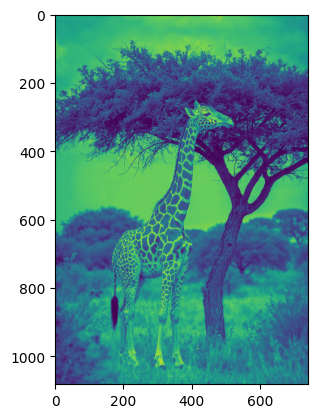

In [16]:
plt.imshow(channels[0])

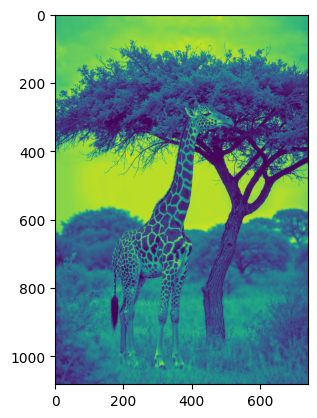

In [17]:
plt.imshow(channels[1])

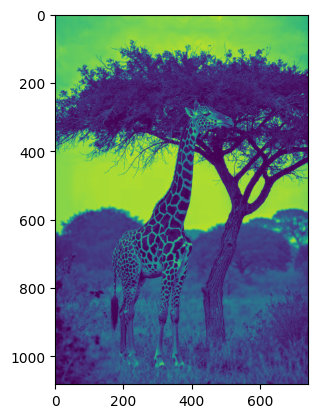

In [18]:
plt.imshow(channels[2])

So visually:

A person’s face will still look like a face in every channel

Tree still looks like a tree

The picture’s shapes remain the same

📌 What changes?

Brightness distribution

Contrast of different areas

Parts dominating one color become brighter in that channel

Colors not present become dark

In [8]:
colors=['red','green','blue']
colors

['red', 'green', 'blue']

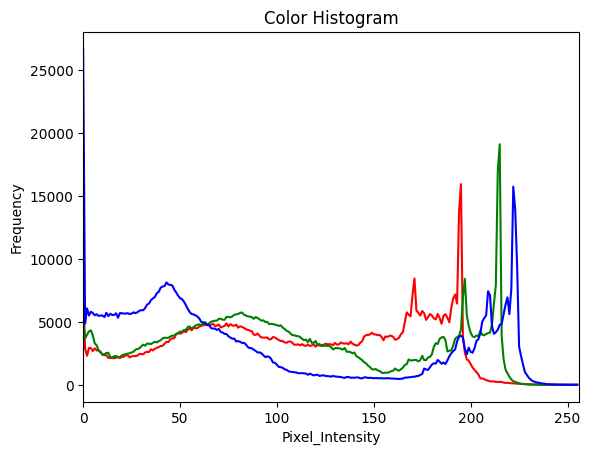

In [10]:
for channel,color in zip(channels,colors):
  hist=cv2.calcHist([channel],[0],None,[256],[0,256])
  # None -> Mask is none we can use entire image #256-Histograms bins Pixel intensities grouped into 256 bins #Pixel values allowed → from 0 to 255
  # we need to use only one channel(Gray scale) where as we plotting histogram for R G B every thing will be one channel
  plt.plot(hist,color=color)
plt.xlim([0,256])
plt.title("Color Histogram")
plt.xlabel("Pixel_Intensity")
plt.ylabel("Frequency")

plt.show()

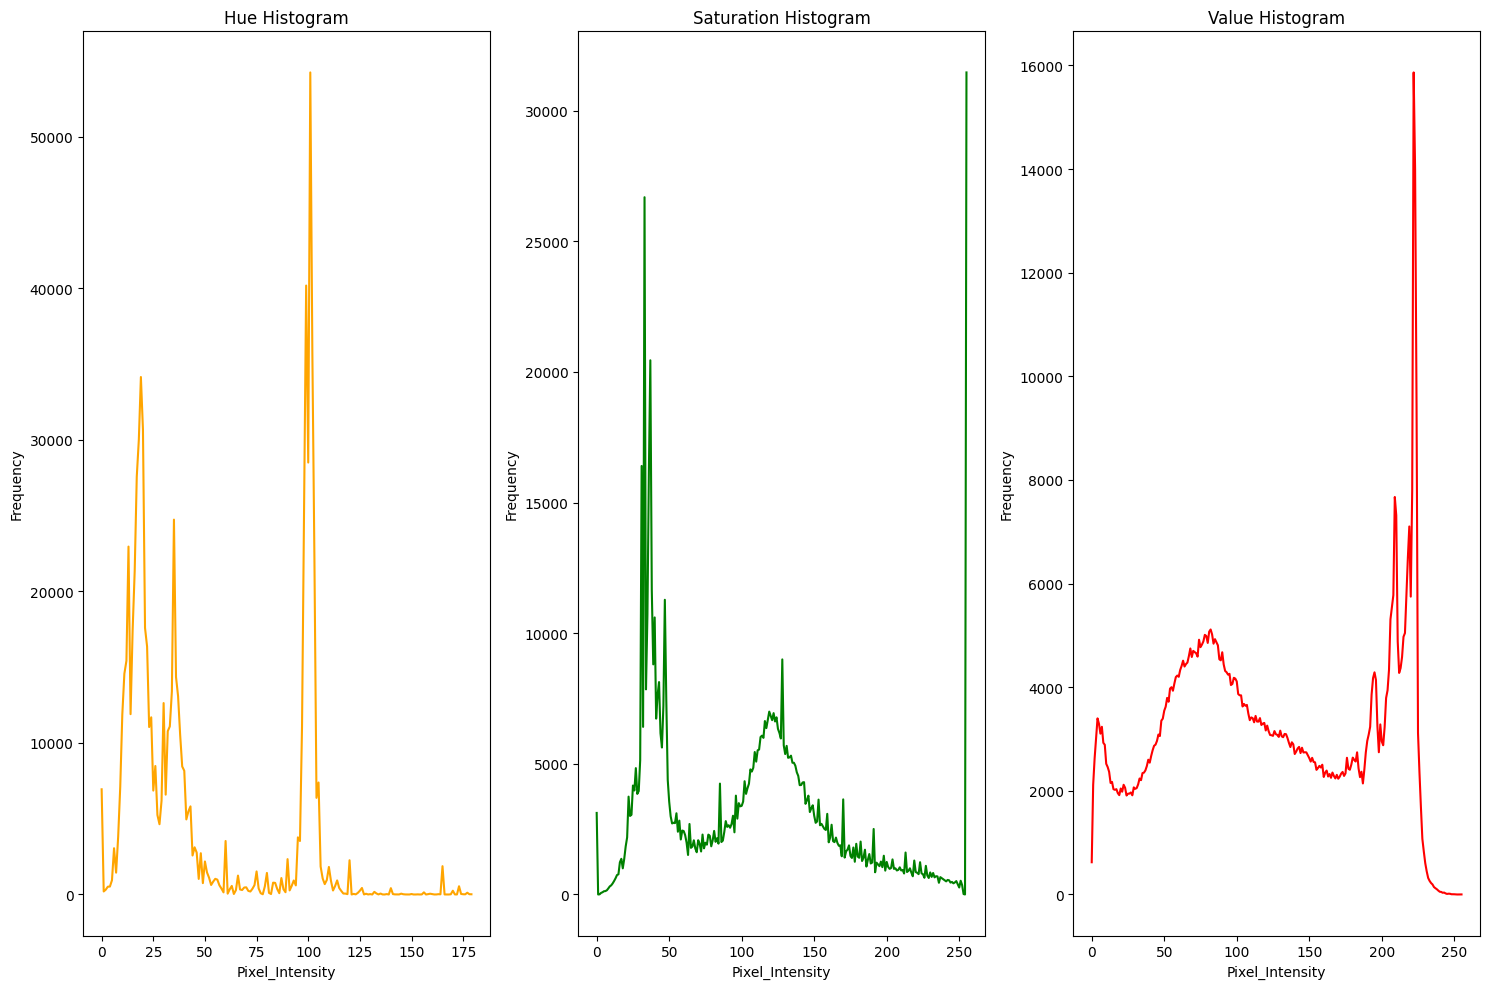

In [26]:
#HSV

image_hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
h,s,v=cv2.split(image_hsv)

h_hist=cv2.calcHist([h],[0],None,[180],[0,180]) #Hue degree of the color based on the spkes we are say 2 colors we are the modt
s_hist=cv2.calcHist([s],[0],None,[256],[0,256]) #Intensity of the color At partuicular intesnsity we are using in the image
v_hist=cv2.calcHist([v],[0],None,[256],[0,256]) #Show Dark vs Light

fig,axes=plt.subplots(1,3,figsize=(15,10))
axes[0].plot(h_hist,color='Orange')
axes[0].set_title("Hue Histogram")
axes[0].set_ylabel("Frequency")
axes[0].set_xlabel("Pixel_Intensity")
axes[1].plot(s_hist,color='Green')
axes[1].set_title("Saturation Histogram")
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("Pixel_Intensity")
axes[2].plot(v_hist,color='Red')
axes[2].set_title("Value Histogram")
axes[2].set_ylabel("Frequency")
axes[2].set_xlabel("Pixel_Intensity")

plt.tight_layout()

plt.show()




#

# Histogram Equalization

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image loaded Successfully


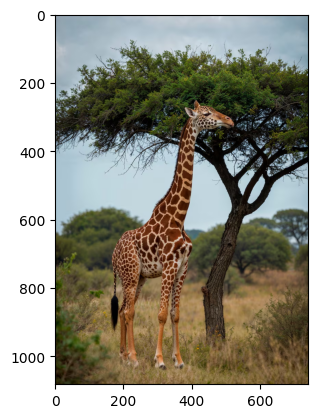

In [29]:
image=cv2.imread("/content/giraffe.avif")

if image is not None:
  print("Image loaded Successfully")
  image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb)
else:
  print("Image Not loaded successfully")

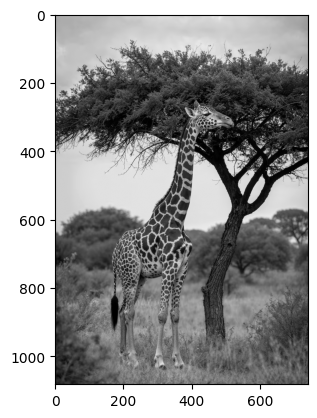

In [32]:
image_gray=cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray,cmap='gray')
#

In [35]:
image_gray.shape

(1082, 740)

In [38]:
# We need image pixels as list. we should get all pixels as the list and we will get this by flattening our image
hist,bins=np.histogram(image_gray.flatten(),256,[0,256])

In [37]:
#Equalization

equalized_image=cv2.equalizeHist(image_gray)
equalized_image
#

array([[185, 185, 186, ..., 178, 178, 177],
       [185, 185, 185, ..., 178, 177, 177],
       [185, 185, 185, ..., 178, 177, 177],
       ...,
       [ 11,  14,  18, ..., 112,  99, 102],
       [ 11,  14,  17, ...,  95,  97, 106],
       [ 11,  14,  18, ...,  97, 102, 110]], dtype=uint8)

In [39]:
equalized_hist,bins=np.histogram(equalized_image.flatten(),256,[0,256])
#

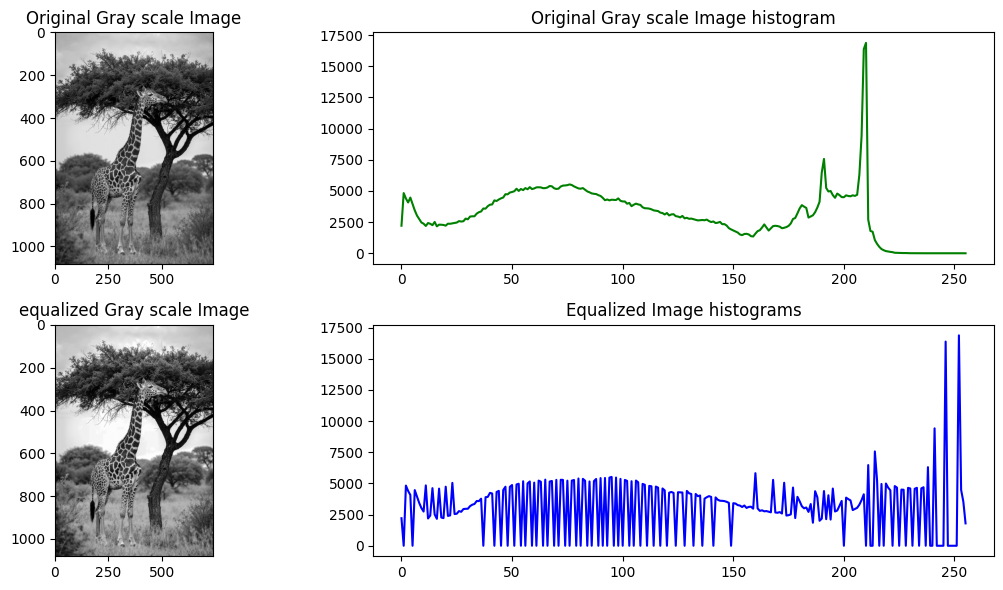

In [43]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(image_gray,cmap='gray')
plt.title("Original Gray scale Image")
plt.subplot(2,2,2)
plt.plot(hist,color='Green')
plt.title("Original Gray scale Image histogram")
plt.subplot(2,2,3)
plt.imshow(equalized_image,cmap='gray')
plt.title("equalized Gray scale Image")
plt.subplot(2,2,4)
plt.plot(equalized_hist,color='Blue')
plt.title("Equalized Image histograms")

plt.tight_layout()
plt.show()

RGB has issue
if i need to changes any values in the r pixel or if i want to change a color just by slightest, all my RGB values changes.

SO I cannot do this on RGB.

So what othe channels where we can focus specialfically on the brightness part

This is Ligtness

And we can keep the color channel as it i ad we will merge it at the end.


There is there are channels like L,a,b it means L lightness and a & b carries the color information

Aother channel called y u v where y will handle the luminane that is the brightness or intensity of the image.

The channel U is chrominance color (It handles thr blue component of the image)

V component handles the red component of your image.

In [48]:
# Convert the image in YUV

image_yuv=cv2.cvtColor(image,cv2.COLOR_BGR2YUV)

# All rows and cloumns but channel O index means Y
image_yuv[:,:,0]=cv2.equalizeHist(image_yuv[:,:,0])

equalized_color_image=cv2.cvtColor(image_yuv,cv2.COLOR_YUV2BGR)
equalized_color_image_RGB= cv2.cvtColor(equalized_color_image,cv2.COLOR_BGR2RGB)


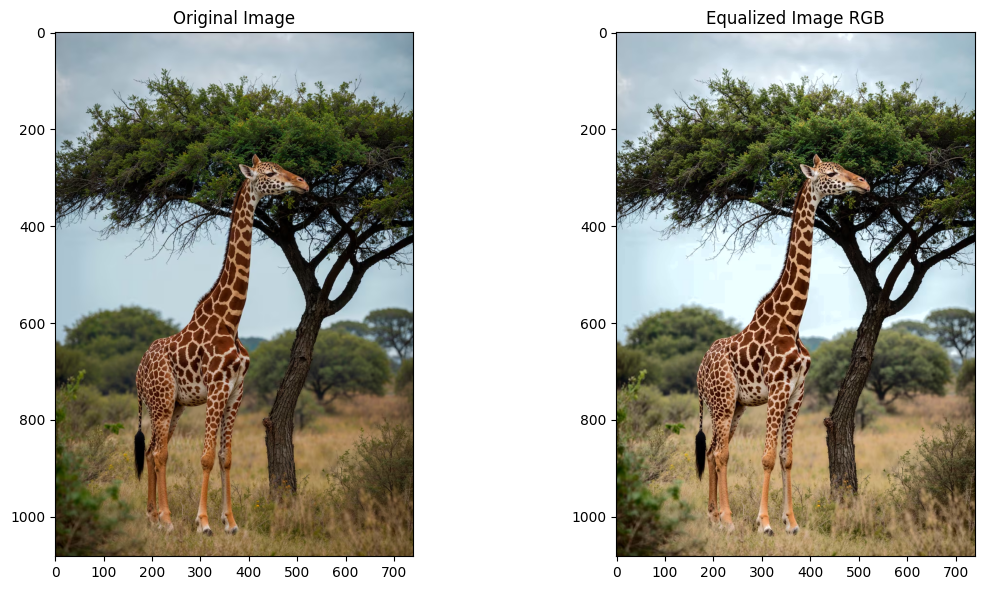

In [49]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(equalized_color_image_RGB)
plt.title("Equalized Image RGB")

plt.tight_layout()
plt.show()